In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [34]:
import datetime as dt
day = '2015-07-05'
y,m,d=day.split("-")


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,func.avg(Measurement.prcp)).filter(Measurement.date<=date[0]).\
    filter(Measurement.date>='2016-08-24').group_by(Measurement.date).all()

date = [result[0] for result in results]
# prec = [result[1] for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['Date','Precipitation'])

# Sort the dataframe by date
#### I did the sorted in the query by grouping by the dates

dtformat = pd.to_datetime(df['Date'])
df['Date'] = dtformat

df.set_index('Date',inplace=True)
df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


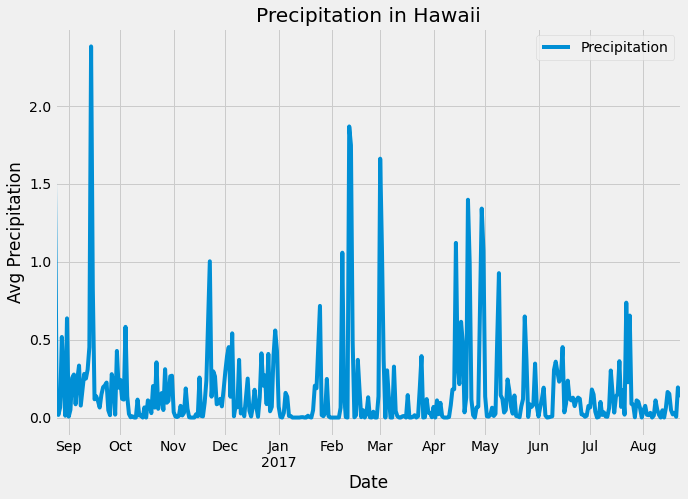

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (10,7),
       title = "Precipitation in Hawaii",
       ylabel = "Avg Precipitation")

# Save figure
plt.savefig('Figures/prec_hist.png')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.agg({'Precipitation':['mean','median','min','max','std']})

,Precipitation
mean,0.169987
median,0.070000
min,0.000000
max,2.380000
std,0.295722


In [21]:
# Design a query to show how many stations are available in this dataset?
st_count = session.query(Station).count()
print(f"Station Count: {st_count}")

Station Count: 9


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activity = session.query(Measurement.station,func.count(Measurement.id)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

most_active = activity[0]
print(f"Most active station: {most_active[0]}")

Most active station: USC00519281


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_stat = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281').all()
temp_stat

[(54.0, 85.0, 71.66378066378067)]

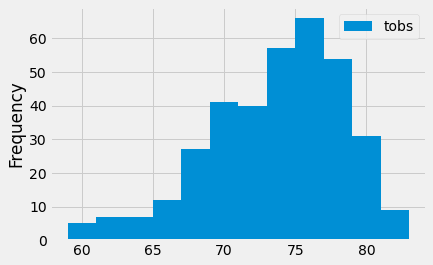

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(Measurement.date).\
    filter(Measurement.station == most_active[0]).order_by(Measurement.date.desc()).\
    first()

temp_result = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date<=recent_date[0]).\
    filter(Measurement.date>='2016-08-19').filter(Measurement.station == most_active[0]).\
    group_by(Measurement.date).all()

recent_temps = [temp[1] for temp in temp_result]

plt.hist(recent_temps,bins=12,label='tobs')
plt.ylabel('Frequency')
plt.legend()

# Save figure
plt.savefig('Figures/temp_hist.png')
plt.show()

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
